In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from datetime import date
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#importing the loan.csv to python and creating the dataframe

Lending_Club = pd.read_csv('./IIITB/loan/loan.csv', encoding = "ISO-8859-1")

In [4]:
Lending_Club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
Lending_Club

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Get the shape of your DataFrame – the number of rows and columns using .shape
Lending_Club.shape

(39717, 111)

In [7]:
# Number of dimensions using .ndim
Lending_Club.ndim

2

In [8]:
Lending_Club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
# DataFrame.tail(), which gives us the last 5 rows.
# Head() and Tail() need to be core parts of our go-to Python Pandas functions for investigating our datasets.

Lending_Club.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Lending_Club.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [11]:
# Describing data with .describe()
Lending_Club.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [12]:
Lending_Club.drop(["acc_now_delinq","initial_list_status","total_il_high_credit_limit","total_bc_limit","total_bal_ex_mort",
"tot_hi_cred_lim","tax_liens","pub_rec_bankruptcies","percent_bc_gt_75","pct_tl_nvr_dlq","num_tl_op_past_12m",
"num_tl_90g_dpd_24m","num_tl_30dpd","num_tl_120dpd_2m","num_sats","num_rev_tl_bal_gt_0","num_rev_accts","num_op_rev_tl",
"num_il_tl","num_bc_tl","num_bc_sats","num_actv_rev_tl","num_actv_bc_tl","num_accts_ever_120_pd",
"mths_since_recent_revol_delinq","mths_since_recent_inq","mths_since_recent_bc_dlq","mths_since_recent_bc","mort_acc",
"mo_sin_rcnt_tl","mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","mo_sin_old_il_acct","delinq_amnt",
"chargeoff_within_12_mths","bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths","inq_last_12m",
"total_cu_tl","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il",
"total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","dti_joint",
"verification_status_joint","tot_coll_amt","tot_cur_bal","annual_inc_joint","mths_since_last_major_derog",
"collections_12_mths_ex_med"],axis=1, inplace=True)

In [13]:
Lending_Club['pymnt_plan'].describe()

count     39717
unique        1
top           n
freq      39717
Name: pymnt_plan, dtype: object

In [14]:
# Deleting the column 'pymnt_plan', since No payment plan has been put in place for the loan
Lending_Club.drop("pymnt_plan",axis=1, inplace=True)

In [15]:
# Assigning Lending club dataframe to new dataframe called New_LC, after deleting the above mentioned columns
New_LC=Lending_Club
New_LC.columns.str.strip()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code',
       'application_type'],
      dtype='object')

In [16]:
# The modified dataframe contains 51 columns
New_LC.shape

(39717, 49)

In [17]:
New_LC['application_type'].describe()

count          39717
unique             1
top       INDIVIDUAL
freq           39717
Name: application_type, dtype: object

In [18]:
New_LC.drop("application_type", axis=1, inplace=True)

In [19]:
New_LC['policy_code'].describe()

count    39717.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

Since publicly available policy_code=1 and there is no other type of policy code, the column is dropped from the dataset

In [20]:
New_LC.drop("policy_code", axis=1, inplace=True)

In [102]:
New_LC['out_prncp'].describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

In [21]:
New_LC['next_pymnt_d'].describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [22]:
New_LC['out_prncp_inv'].describe()

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

In [104]:
# url data is nowhere useful and been dropped from the dataset

New_LC.drop("url", axis=1, inplace=True)

In [23]:
New_LC['pub_rec'].describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [238]:
New_LC.shape

(39717, 46)

In [24]:
New_LC.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [107]:
New_LC['next_pymnt_d'].fillna(0, inplace=True)

In [25]:
New_LC.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16


In [109]:
New_LC.shape

(39717, 46)

In [110]:
# Filling the blank value at column "emp_title" with Not Given
New_LC["emp_title"].fillna("Not Given", inplace = True)  

In [111]:
# Stripping the XX present in zip code string
New_LC['zip_code'] = New_LC['zip_code'].map(lambda x: x.rstrip('xx'))

In [112]:
New_LC['zip_code']

0        860
1        309
2        606
3        917
4        972
5        852
6        280
7        900
8        958
9        774
10       853
11       913
12       245
13       606
14       951
15       641
16       921
17       067
18       890
19       921
20       770
21       335
22       799
23       917
24       900
25       605
26       103
27       150
28       326
29       564
        ... 
39687    334
39688    331
39689    041
39690    330
39691    021
39692    100
39693    339
39694    303
39695    017
39696    113
39697    805
39698    222
39699    469
39700    306
39701    461
39702    314
39703    100
39704    017
39705    017
39706    530
39707    530
39708    333
39709    537
39710    537
39711    804
39712    802
39713    274
39714    017
39715    208
39716    027
Name: zip_code, Length: 39717, dtype: object

In [113]:
New_LC['zip_code'].value_counts()

100    597
945    545
112    516
606    503
070    473
900    453
021    397
300    394
926    371
750    367
941    356
331    349
917    348
921    346
770    321
117    303
113    284
852    279
913    278
330    255
891    255
080    244
925    237
902    235
334    234
201    229
920    228
980    224
951    223
303    220
      ... 
007      1
381      1
677      1
747      1
044      1
465      1
369      1
252      1
823      1
385      1
669      1
248      1
522      1
463      1
372      1
736      1
471      1
834      1
833      1
396      1
408      1
397      1
162      1
375      1
384      1
266      1
093      1
681      1
473      1
378      1
Name: zip_code, Length: 823, dtype: int64

## Univariate Analysis

### var = purpose . This variable contains the purpose of taking loan 

In [37]:
New_LC['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

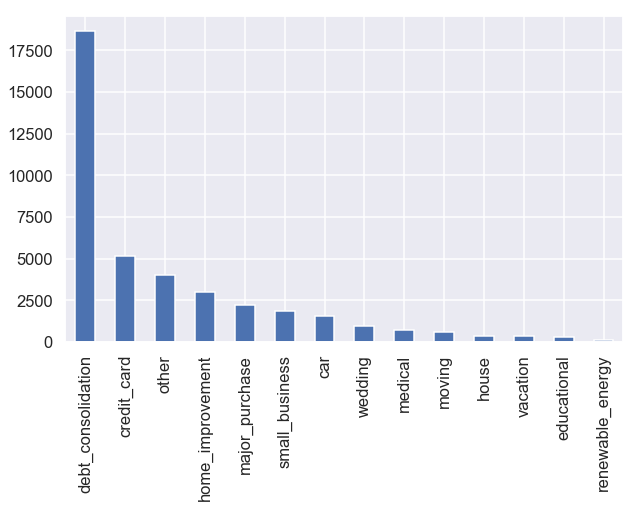

In [115]:
# Bar plot to visualize the purpose for which the loan is borrowed
New_LC['purpose'].value_counts().plot(kind='bar');

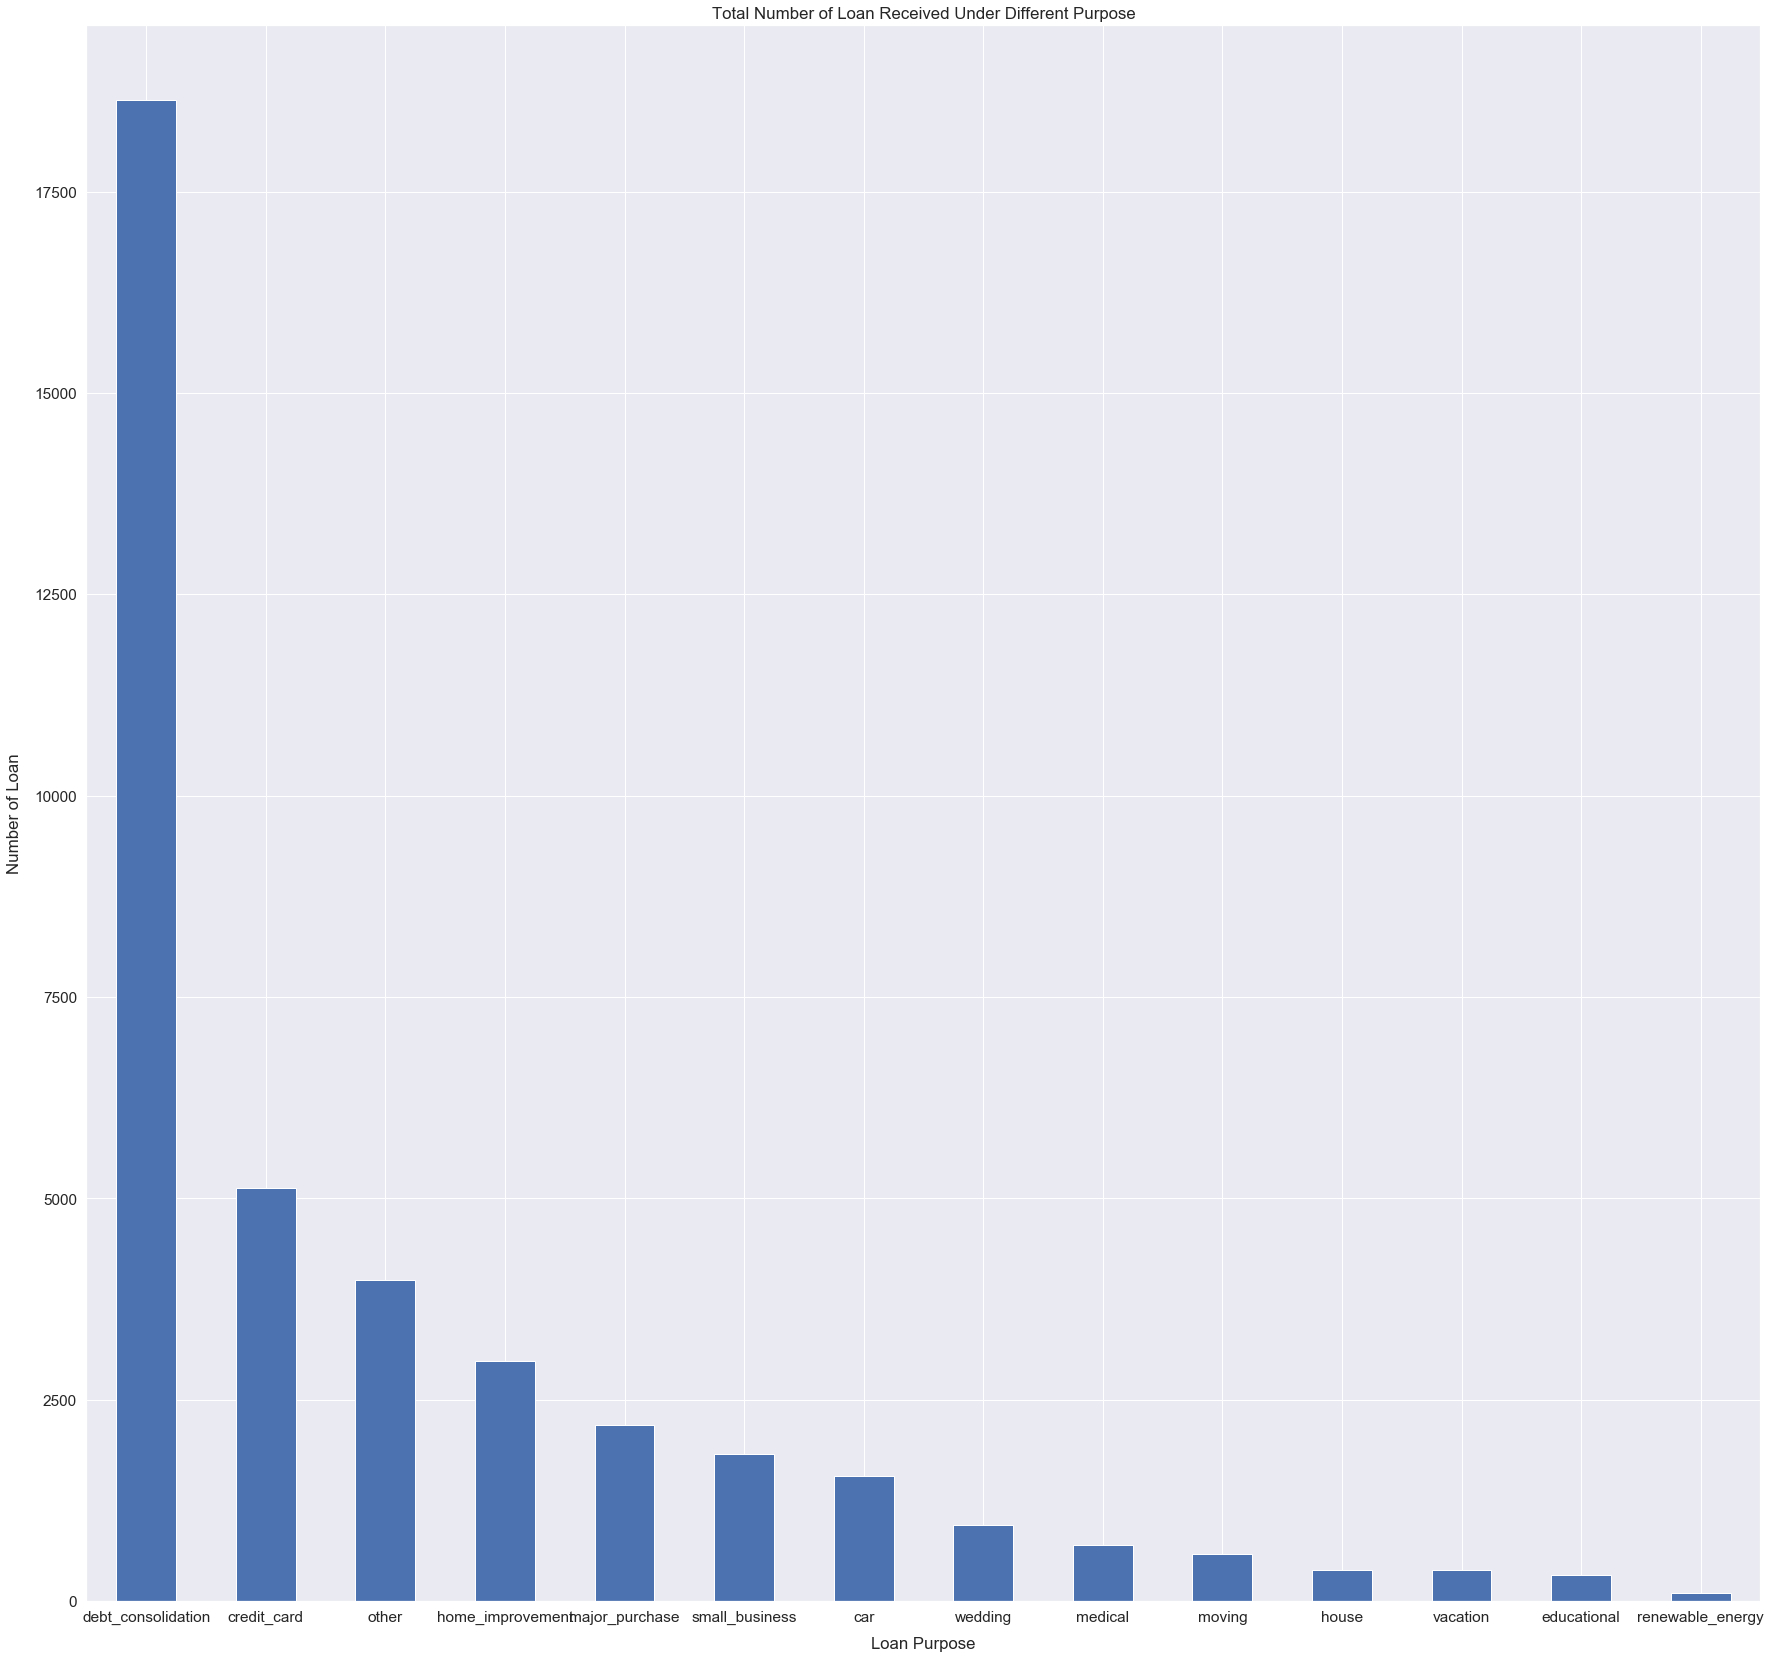

In [116]:
# Below, I apply several styles to our plot from above so it's easier to interpret.

sns.set(font_scale=1.4)
New_LC['purpose'].value_counts().plot(kind='bar', figsize=(30, 29), rot=0)
plt.xlabel("Loan Purpose", labelpad=12)
plt.ylabel("Number of Loan", labelpad=12)
plt.title("Total Number of Loan Received Under Different Purpose", y=1);

We can observe from the above graph that the major reason for Loan borrowing is "Debdt Consolidation" followed by Credit card payment. 

### Var = loan_amnt . This is the loan amount offered to the Borrower by the Lending club 

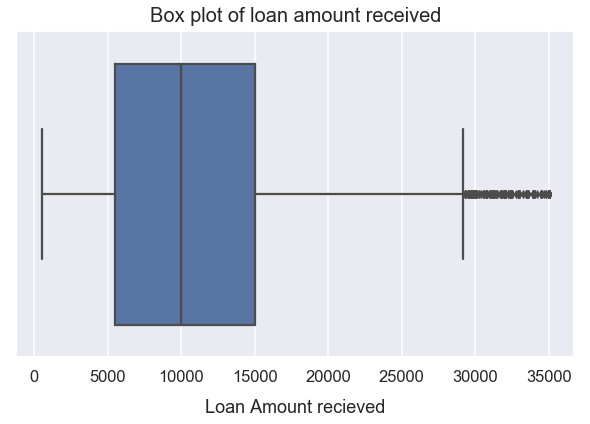

In [117]:
# Box Plot to check the Quartiles and median

sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("talk")

ax = sns.boxplot(x=[New_LC['loan_amnt']])
ax.axes.set_title("Box plot of loan amount received", fontsize=20, y=1.01)
plt.xlabel("Loan Amount recieved", labelpad=14);

In [118]:
New_LC['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The median loan amount disbursed is roughly 10000

The minimum loan amount disbursed is 500 and maximum loan amount disbursed is 35000

75% of people recieved a loan amount above 5500. 25% of people recieved a loan amount above 15000

In [269]:
n=New_LC.loc[New_LC['loan_amnt']>29250,'loan_amnt']
f=pd.DataFrame(n)
f.describe()


,loan_amnt
count,1230.000000
mean,33050.447154
std,2326.079022
min,29275.000000
25%,30000.000000
50%,35000.000000
75%,35000.000000
max,35000.000000


The outlieres count is 1230 . However we are not deleting them because a higher loan amount should also be a part of the analysis . Removing or imputing them will lead to wrong conclusions.

 ### Variable = annual_inc . This variable stores the annual income of the borrower 

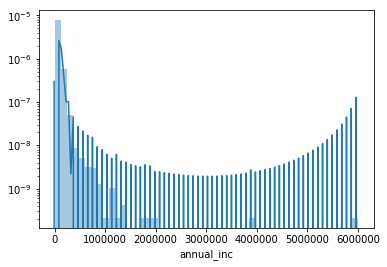

In [21]:
#histogram



g=sns.distplot(New_LC['annual_inc'],hist_kws={'log':True})

We observe that people with less income have been given higher loans . This may be one of the possible causes of deault and should be reduced.

### Variable = emp_length . The employment length is stored in this variable 


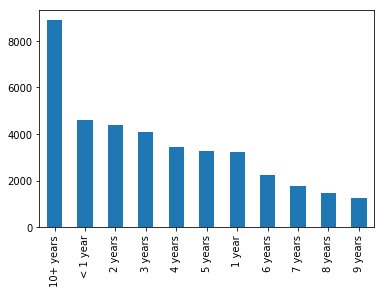

In [24]:
#histogram



New_LC['emp_length'].value_counts().plot.bar()

The graph clearly shows that people with employment length >10+ years are offered the most number of loans. However an interesting discovery is that the next to follow are teh people with less than one year of experience . This needs a check as this group belongs to the people who haven't reached a stable position in their career and are much likely to default.

### var = pub_rec_bankruptcies . This variable stores the number of public record bankruptcies

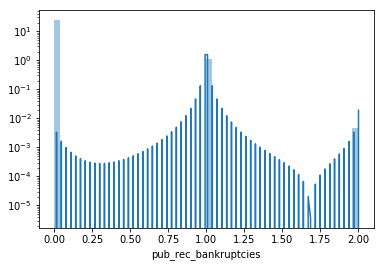

In [44]:

g=sns.distplot(New_LC['pub_rec_bankruptcies'],hist_kws={'log':True})

The graph shows that most of the loans have been given to the people with 0 Bankruptcies , which is a good measure . However there is no record in the dataset for more than 2 bankruptcies which means that people with more than 2 bankruptcies have not been entertained by the lending club . The bar at 1 and 2 is fairly lower than the one at 0 which suggests that proper checks are being done on the customer lending history before offering him/her the loan.The spike at 1 however needs to be questioned to get a reasonable explanation from the business.

### var= term . This variable stores the number of payments on the loan. Values are in months and can be either 36 or 60.

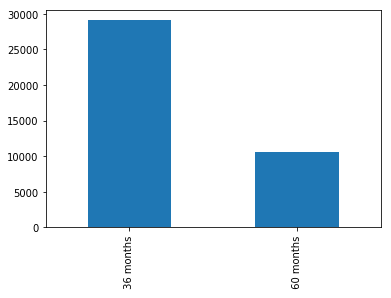

In [46]:
New_LC['term'].value_counts().plot.bar()

 The graph  shows that most of the loans (close to 30000) have been given for a tenure of 36 months. Around 10000 loans have been given for a tenure of 60 months . Thus there are more short teem loans offered by the lending club than long term loans. We need to check for the reason behind this spike of 36 months loan 
 

## Bivariate Analysis

### annual_inc v/s loan_amnt


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


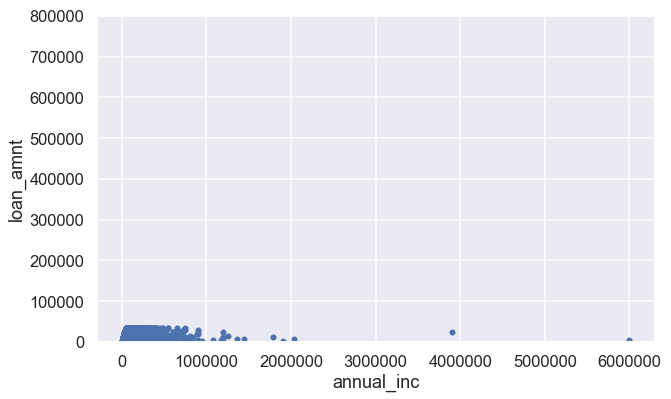

In [123]:
#scatter plot grlivarea/saleprice
var = 'annual_inc'
data = pd.concat([New_LC['loan_amnt'], New_LC[var]], axis=1)
data.plot.scatter(x=var, y='loan_amnt', ylim=(0,800000));

Since the data is difficult to interpret in this scale , we are changing the scale to log-log 

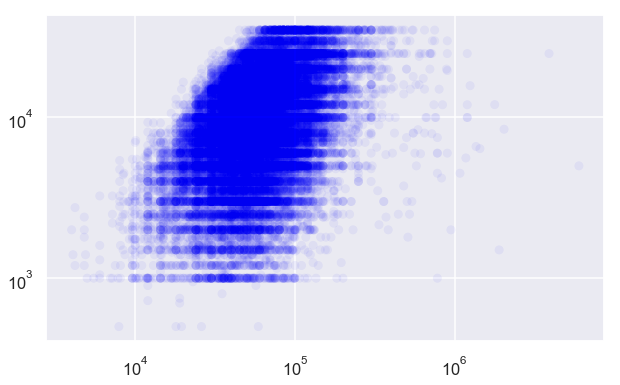

In [124]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(New_LC['annual_inc'] ,New_LC['loan_amnt'] , c='blue', alpha=0.05, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

The graph shows that there is a positive correlation between the annual income and loan amount 

### var = dti . dti is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


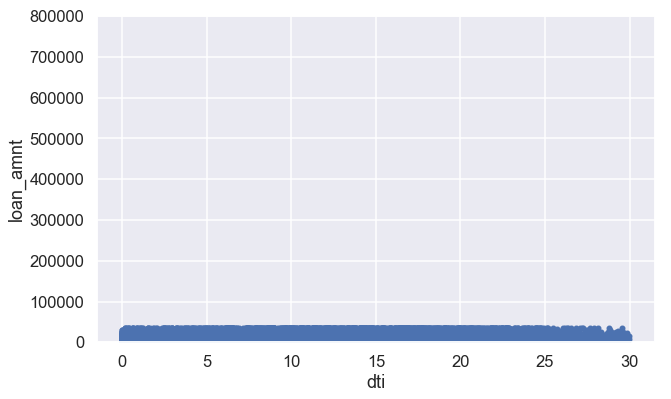

In [125]:

var = 'dti'
data = pd.concat([New_LC['loan_amnt'], New_LC[var]], axis=1)
data.plot.scatter(x=var, y='loan_amnt', ylim=(0,800000));

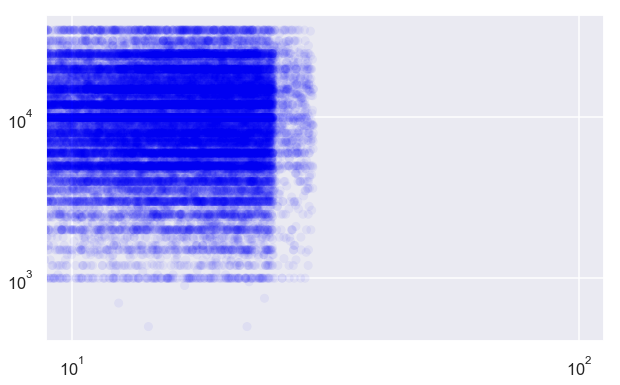

In [126]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(New_LC['dti'] ,New_LC['loan_amnt'] , c='blue', alpha=0.05, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

The plot shows that there is no correlation between dti and loan_amount 

#### Grade v/s loan_amnt

1. grade = LC assigned loan grade
2. loan_amnt= The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

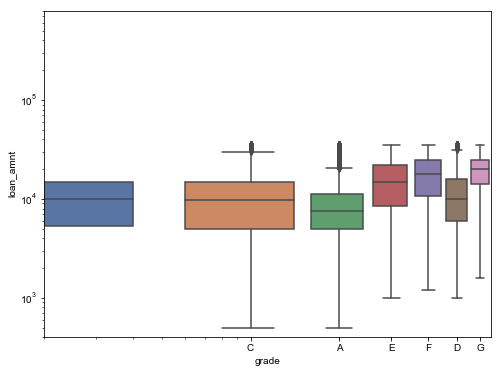

In [26]:
#box plot grade/loan_amnt
var = 'grade'
data = pd.concat([New_LC['loan_amnt'], New_LC[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
ax.set(xscale="log",yscale="log")
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=800000);




#### Following conclusions can be drawn from the plot above :
1.  the median loan amount for grade B and C is almost same and the interquartile range is also almost equal
2.  The median loan amount for grade A is the least and also the interquartile range is the smallest 
3.  The grades E and F are offered loans in the same ranges but at times the loan offered exceeds the loan offered to the customers  with better grades
4.  The lower quartile of grade G is very close to the upper quartile of grade B and C . That means the customers with poor grades as G are also being offered loans which are close to the highest loan being offered to the customers with better grades

### loan_status v/s loan_amnt

1. loan_status = current status of the loan 
2. loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

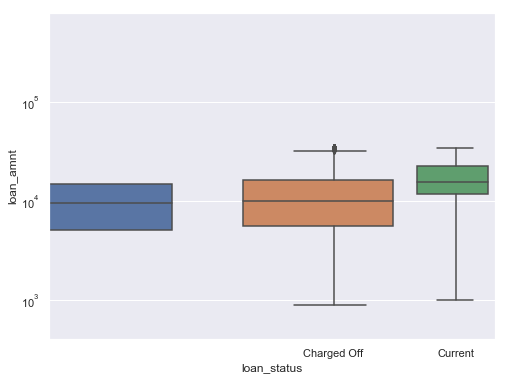

In [31]:
var = 'loan_status'
data = pd.concat([New_LC['loan_amnt'], New_LC[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
ax.set(xscale="log",yscale="log")
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=800000);

#### Conclusions :
The plot for Charged Off and Fully Paid loan is almost identical. thus there is no correlation between the loan_amount being offered and the customer being Charged Off.

### loan_amnt v/s emp_length
1. loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

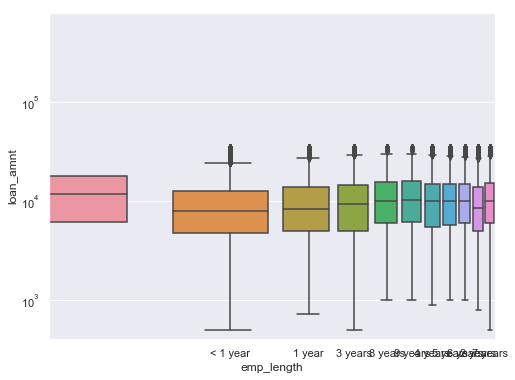

In [36]:
var = 'loan_amnt'
data = pd.concat([New_LC['emp_length'], New_LC[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
ax.set(xscale="log",yscale="log")
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.boxplot(x="emp_length", y=var, data=data)
fig.axis(ymin=0, ymax=800000);

The box plot shows that the spread of loan offered goes on increasing as the employment length increase . The presence of outliers indicates that there is no strict restriction on the amount of loan being offered based on the employment length alone 

### Now let us plot correlation matrix and analyse the correlation between the variables 


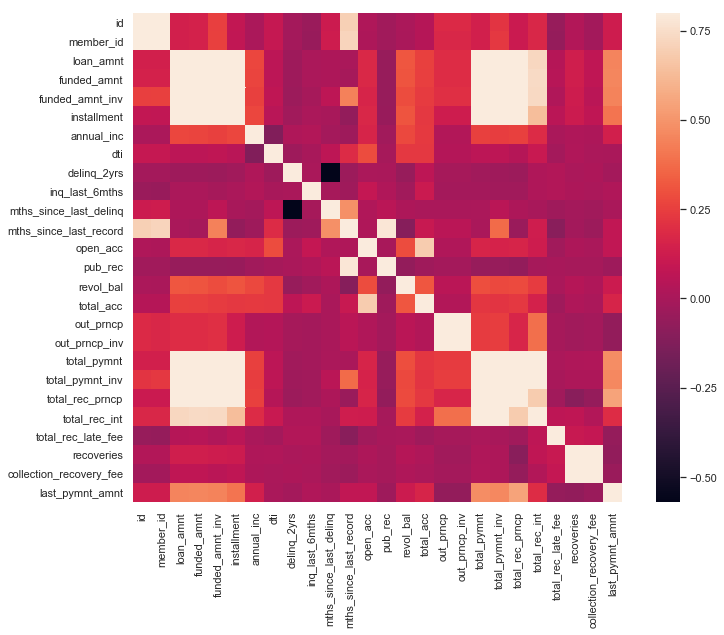

In [28]:
corrmat = New_LC.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Conclusions :
1. annual income is positivley correlated with loan_amnt,funded_amnt, instalment
2. open_acc , which is the number of credit lines opened in borrowers credit profile is negatively correlated with recoveries. Thus the customers with high open_acc should be checked
3. pub_rec shows a similar trend as open_acc , thus borrowers with a high value of pub_rec should be watched.
4. total_pymnt_inv shows a negative correlation with the pub_rec field which is good from the lending club perspective as the investors are not investing much on the borrowers with high pub_rec values 
5. months_since_last_delinquent is negatively correlated with almost all variables and thus borrowers with higher values for the aforesaid column should be well analysed before offering any loan 



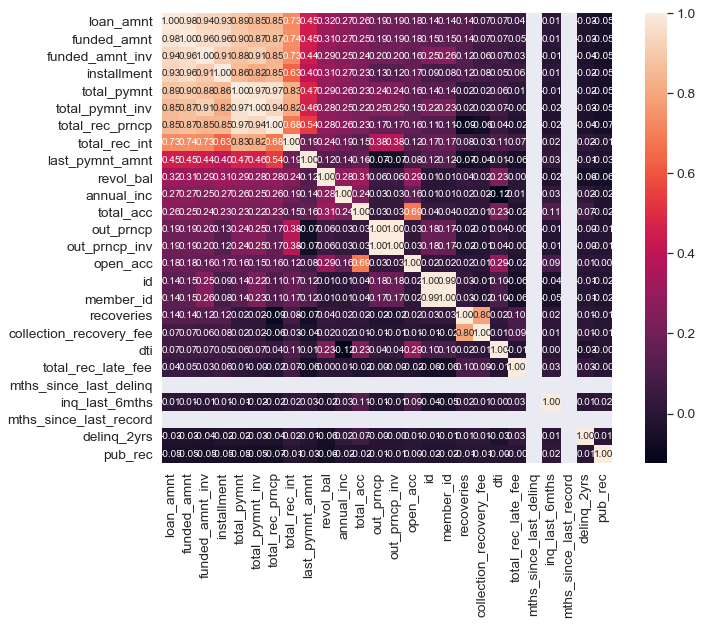

In [29]:
k = 26 #number of variables for heatmap
cols = corrmat.nlargest(k, 'loan_amnt')['loan_amnt'].index
cm = np.corrcoef(New_LC[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Some of the strongly correlated variables with loan_amnt field are funded_amnt , funded_amnt_inv , installment , total_pymnt , total_pymnt_inv. Let us plot scatter plots for these 

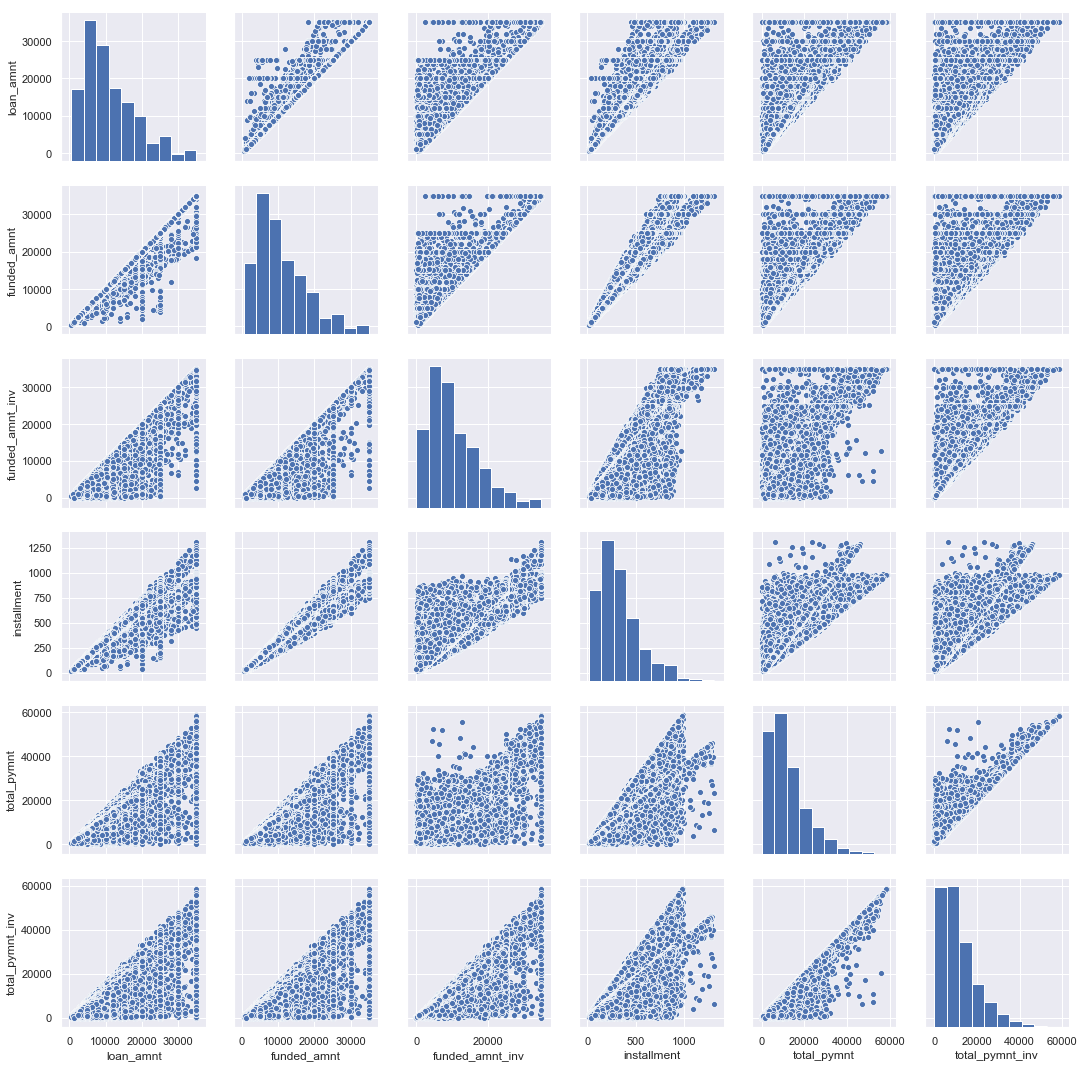

In [30]:
#scatterplot
sns.set()
cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv']
sns.pairplot(New_LC[cols], size = 2.5)
plt.show();

The graph clearly shows a positive correlation between the mentioned columns 